**Prediction Presence of Diabetes with Age, BMI, and Blood Sugar Level**

**Introduction:**

**Preliminary Exploratory Data Analysis:**

In [13]:
library(tidyverse)
library(tidymodels)
library(dplyr)


url <- "https://raw.githubusercontent.com/danialtaj0/Dataset/main/diabetes_prediction_dataset.csv"
diabetes_data <- read_csv(url) |>
                 mutate(diabetes = as_factor(diabetes))

set.seed(1)

diabetes_split <- initial_split(diabetes_data, prop = 0.75, strata = diabetes)
diabetes_train <- training(diabetes_split)
diabetes_test <- testing(diabetes_split)
glimpse(diabetes_train)

class_distribution <- diabetes_train |>
  group_by(diabetes) |>
  summarise(Count = n())

class_distribution

predictor_means <- diabetes_train |>
  summarise(
    mean_bmi = mean(bmi, na.rm = TRUE),
    mean_age = mean(age, na.rm = TRUE),
    mean_blood_glucose_level = mean(blood_glucose_level, na.rm = TRUE)
  )

predictor_means

# Filtering rows where there is missing data in any of the specified columns
rows_with_missing_data <- diabetes_train |>
  filter(is.na(bmi) | is.na(age) | is.na(blood_glucose_level) | is.na(diabetes))

# Count the number of rows with missing data
num_rows_with_missing_data <- nrow(rows_with_missing_data)

# Print the count
missing_data <- tibble(n_rows_missing_data = num_rows_with_missing_data)
missing_data

Rows: 100000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): gender, smoking_history
dbl (7): age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_l...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 75,000
Columns: 9
$ gender              <chr> "Female", "Female", "Female", "Female", "Female", …
$ age                 <dbl> 80, 20, 44, 79, 32, 53, 54, 78, 67, 76, 78, 15, 42…
$ hypertension        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ heart_disease       <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ smoking_history     <chr> "never", "never", "never", "No Info", "never", "ne…
$ bmi                 <dbl> 25.19, 27.32, 19.31, 23.86, 27.32, 27.32, 54.70, 3…
$ HbA1c_level         <dbl> 6.6, 6.6, 6.5, 5.7, 5.0, 6.1, 6.0, 5.0, 5.8, 5.0, …
$ blood_glucose_level <dbl> 140, 85, 200, 85, 100, 85, 100, 130, 200, 160, 126…
$ diabetes            <fct> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…


diabetes,Count
<fct>,<int>
0,68653
1,6347


mean_bmi,mean_age,mean_blood_glucose_level
<dbl>,<dbl>,<dbl>
27.30796,41.96079,138.1894


n_rows_missing_data
<int>
0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


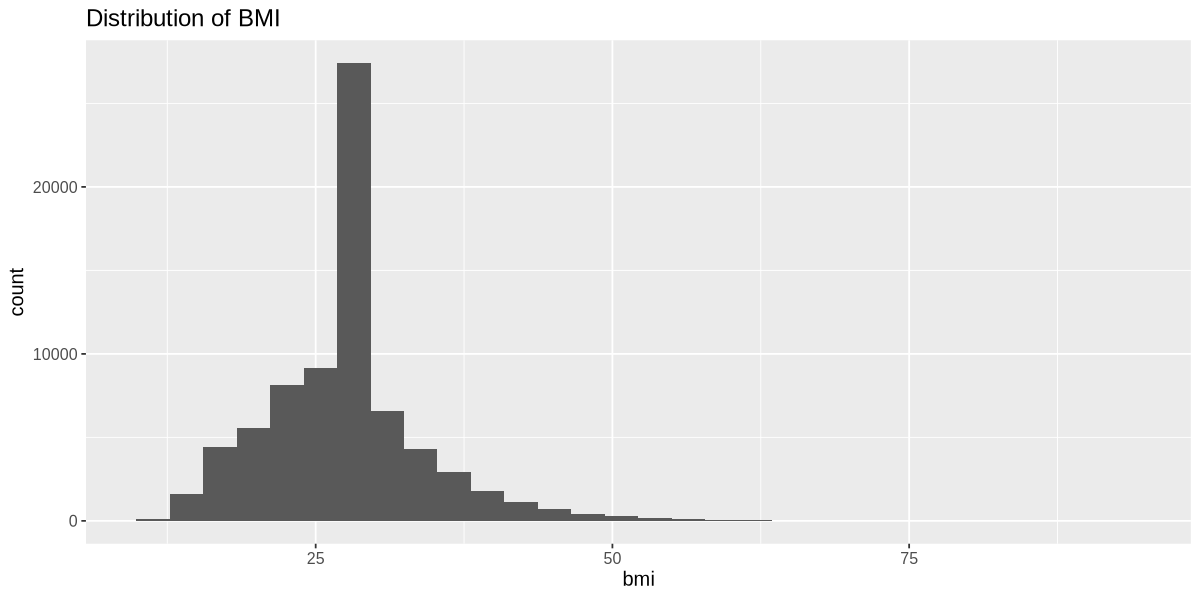

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


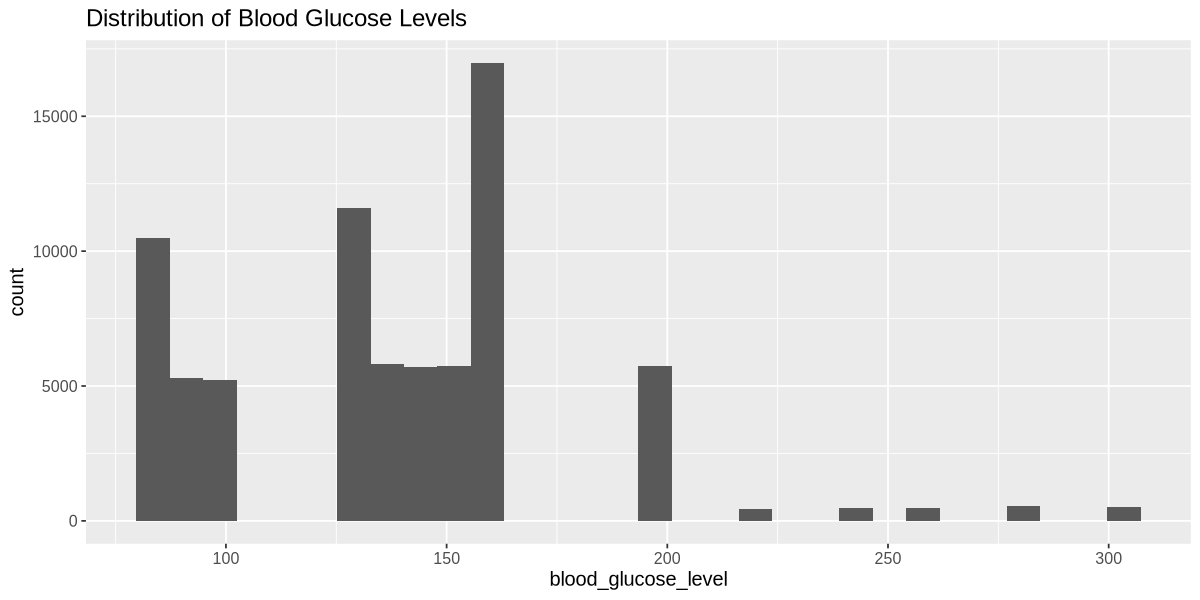

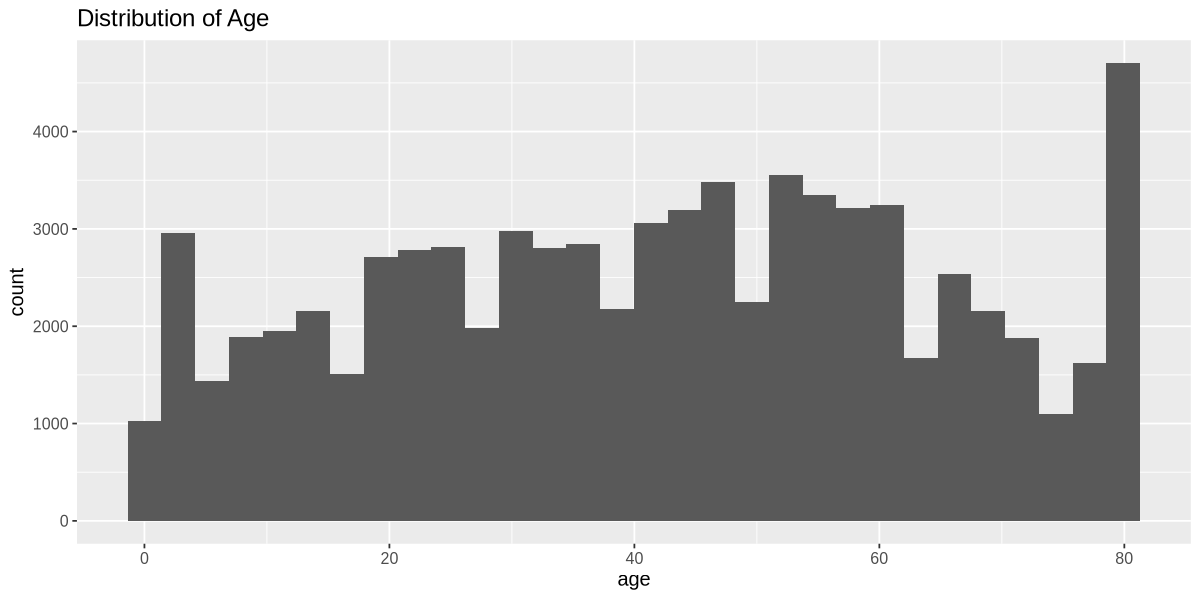

In [5]:
#making histograms
options(repr.plot.height = 5, repr.plot.width = 10)

bmi_dist <- ggplot(diabetes_train, aes(x = bmi)) + 
    geom_histogram() + 
    theme(text = element_text(size = 12)) + 
    ggtitle("Distribution of BMI") 

blood_glucose_dist <- ggplot(diabetes_train, aes(x = blood_glucose_level)) + 
    geom_histogram() + 
    theme(text = element_text(size = 12)) + 
    ggtitle("Distribution of Blood Glucose Levels")

age_dist <- ggplot(diabetes_train, aes(x = age)) + 
    geom_histogram() + 
    theme(text = element_text(size = 12)) + 
    ggtitle("Distribution of Age")

bmi_dist
blood_glucose_dist
age_dist

**Methods:** 

This project aims to classify patients as either diabetic or non-diabetic using the k-nearest neighbors (knn) algorithm and age, BMI, and blood glucose levels as the predictor variables. As the dataset contains many more non-diabetic than diabetic individuals, the algorithm may be biased toward making non-diabetic predictions. To control for this, it will be necessary to upsample the diabetic data points until there is an equal proportion of both outcomes. The altered dataset will then be separated into a “training” set and “testing” set using random stratified sampling with a seed value of 1, and the three predictor variables will be standardized to a mean of 0 and a standard deviation of 1. 10-fold cross-validation will be used to find the optimal value of k to build the prediction model. 

The results will be visualized using three scatter plots: one for each combination of two variables. Diabetic and non-diabetic data points will be differentiated by shape and colour, and regions for which the algorithm would predict diabetic and non-diabetic will be differentiated by colour. 

**Expected outcomes and significance:**